<a href="https://www.kaggle.com/code/judychang96/analyzing-airbnb-supply-in-european-cities?scriptVersionId=196857222" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This dataset provides insights into various attributes of Airbnb listings across several major European cities. In the following analysis, I explore Airbnb supply patterns across different locations using exploratory data analysis and offer recommendations for deeper exploration.

> Due to the limitations of the available data, the following factors are not considered in this analysis:
> * Impact from time-related factors such as seasons, holidays, or special events
> * Influence from demand supported by guest booking data

---

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Import datasets

In [2]:
csv_urls = [
    '../input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/amsterdam_weekends.csv',
    '../input/airbnb-prices-in-european-cities/athens_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/athens_weekends.csv',
    '../input/airbnb-prices-in-european-cities/barcelona_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/barcelona_weekends.csv',
    '../input/airbnb-prices-in-european-cities/berlin_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/berlin_weekends.csv',
    '../input/airbnb-prices-in-european-cities/budapest_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/budapest_weekends.csv',
    '../input/airbnb-prices-in-european-cities/lisbon_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/lisbon_weekends.csv',
    '../input/airbnb-prices-in-european-cities/london_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/london_weekends.csv',
    '../input/airbnb-prices-in-european-cities/paris_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/paris_weekends.csv',
    '../input/airbnb-prices-in-european-cities/rome_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/rome_weekends.csv',
    '../input/airbnb-prices-in-european-cities/vienna_weekdays.csv',
    '../input/airbnb-prices-in-european-cities/vienna_weekends.csv',
]

dfs = []
for url in csv_urls:
  df = pd.read_csv(url)
  df['city'] = url.split('/')[-1].split('_')[0].capitalize()
  if url.endswith("days.csv"):
    df['is_weekend'] = False
  else:
    df['is_weekend'] = True
  dfs.append(df)

original_data = pd.concat(dfs, ignore_index=True)
original_data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,is_weekend
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,False
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,False
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,False
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,False
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,False


In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

# Data Preprocessing

In [4]:
cleaned_data = original_data.copy()

### 1. Remove unnecessary columns

In [5]:
cleaned_data.drop(columns=['Unnamed: 0', 'attr_index_norm', 'rest_index_norm'], inplace=True)
cleaned_data = cleaned_data.reset_index(drop=True)

### 2. Rename the cloumns

In [6]:
cleaned_data.rename(columns={'realSum': 'price', 'dist': 'centr_dist'}, inplace=True)

### 3. Remove the duplicate rows

In [7]:
cleaned_data.drop_duplicates(inplace=True)

### 4. Remove the missing values

Based on the table below, there are no missing values that need attention.

In [8]:
# Check if there's any missing values
cleaned_data.isnull().sum()

price                         0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
centr_dist                    0
metro_dist                    0
attr_index                    0
rest_index                    0
lng                           0
lat                           0
city                          0
is_weekend                    0
dtype: int64

### 5. Convert column types

In [9]:
# Convert 'multi' and 'biz' into boolen cloumns
cleaned_data['multi'] = cleaned_data['multi'].astype(bool)
cleaned_data['biz'] = cleaned_data['biz'].astype(bool)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  bool   
 7   biz                         51707 non-null  bool   
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  centr_dist                  51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

# EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

In the dataset, London, Rome, Paris, and Lisbon collectively represent over half of the listings, while Amsterdam and Berlin have fewer listings, each comprising less than 5%.

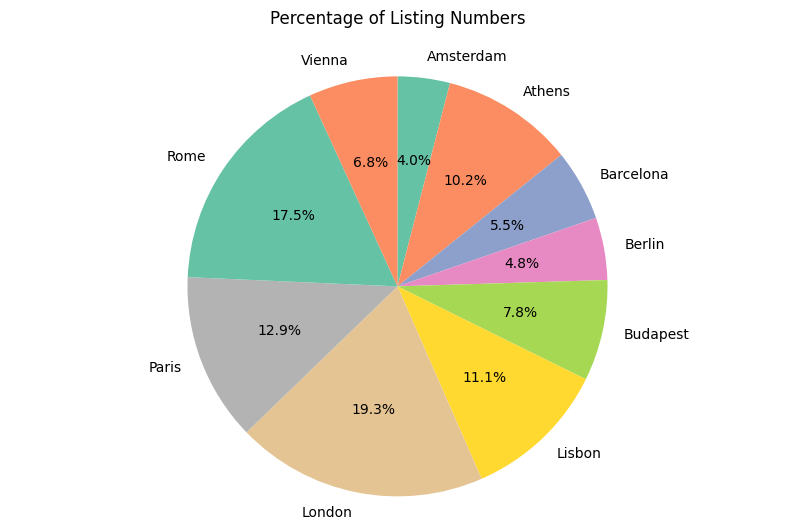

In [11]:
# Count the number of listings per city
counts = cleaned_data.groupby(['city']).size()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

# Customize the plot
plt.title('Percentage of Listing Numbers', y=1.05)
plt.axis('equal')

plt.show()

I plot the data on a map to visualize their relative geographical locations. There are four cities in Western Europe, four cities in Southern Europe, one city in Central Europe, and one in Eastern Europe.

In [12]:
import folium
from folium.plugins import HeatMap

In [13]:
map = folium.Map(location=[50.0, 10.0], zoom_start=4)

# Prepare data for the heatmap, using price as the weight
heat_data = [[row['lat'], row['lng'], row['price']] for index, row in cleaned_data.iterrows()]

# Create and add heatmap layer
HeatMap(
    heat_data,
    gradient={0.2: 'blue', 1: 'blue'},  # Single color for heatmap
    radius=15,  # Adjust radius for heat intensity
    blur=10,    # Adjust blur to spread the heat
    max_zoom=1
).add_to(map)

map

## Handling Outliers

From the density plot and box plot, we can observe that the price distributions for each city are extremely right-skewed due to some very high-priced listings.

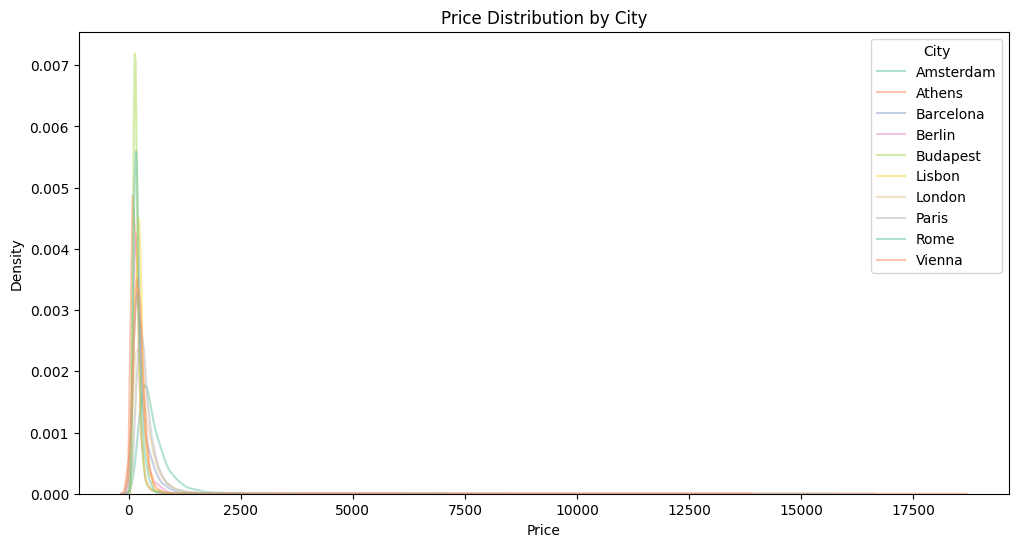

In [14]:
cities = cleaned_data['city'].unique()

# Plot the density plot
plt.figure(figsize=(12, 6))
for city in cities:
    city_data = cleaned_data[cleaned_data['city'] == city]['price']
    sns.kdeplot(city_data, label=city, alpha=0.5)

# Customize the plot
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution by City')
plt.legend(title='City')

plt.show()

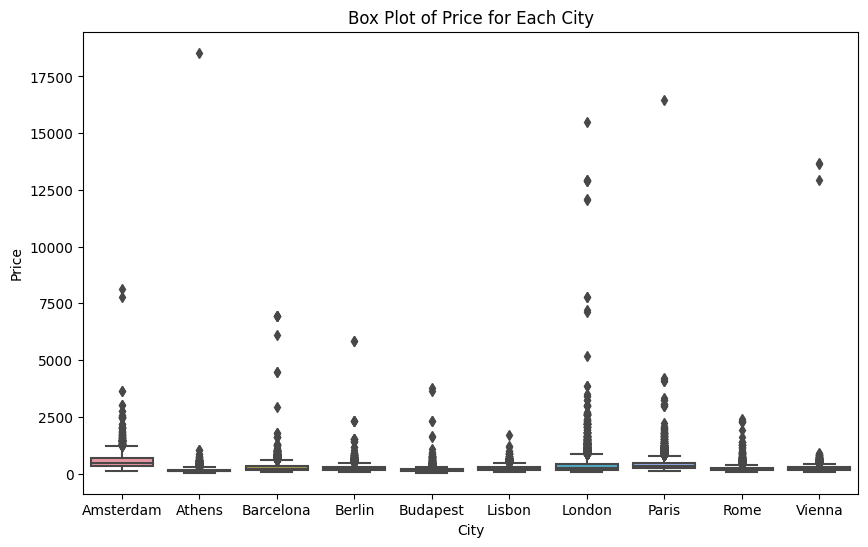

In [15]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', data=cleaned_data)

# Customize the plot
plt.title('Box Plot of Price for Each City')
plt.xlabel('City')
plt.ylabel('Price')

plt.show()

I filter out these outliers to eliminate their influence on the overall analysis.

In [16]:
city_groups = cleaned_data.groupby('city')['price']
outlier_indices = []

# Identify outliers
for city, prices in city_groups:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = prices.quantile(0.25)
    Q3 = prices.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier indices for the city
    city_outliers_indices = cleaned_data[(cleaned_data['city'] == city) & ((cleaned_data['price'] < lower_bound) | (cleaned_data['price'] > upper_bound))].index

    outlier_indices.extend(city_outliers_indices)

# Create a dataframe for outliers
outliers = cleaned_data.loc[outlier_indices]

# Remove outliers from the original dataset
cleaned_data_no_outliers = cleaned_data.drop(index=outlier_indices)

#print("Outliers:")
#print(outliers)
#print("\nDataFrame without Outliers:")
#print(cleaned_data_no_outliers)

As seen below, there were a total of 2706 outliers.

In [17]:
outliers.shape

(2706, 19)

In [18]:
outliers.groupby('city').size().reset_index(name='number of outliers')

,city,number of outliers
0,Amsterdam,105
1,Athens,293
2,Barcelona,227
3,Berlin,165
4,Budapest,223
5,Lisbon,192
6,London,531
7,Paris,386
8,Rome,433
9,Vienna,151


## Analyzing the data

### Q1: Are there rental price differences among European cities?

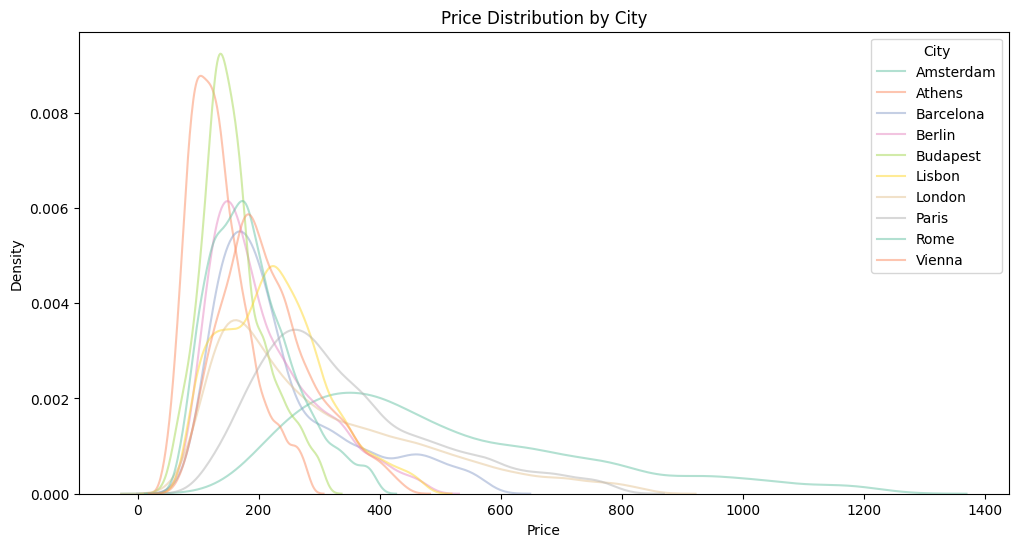

In [19]:
cities = cleaned_data_no_outliers['city'].unique()

# Plot the density plot
plt.figure(figsize=(12, 6))
for city in cities:
    city_data = cleaned_data_no_outliers[cleaned_data_no_outliers['city'] == city]['price']
    sns.kdeplot(city_data, label=city, alpha=0.5)

# Customize the plot
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution by City')
plt.legend(title='City')

plt.show()

After removing the outliers, the price distributions of each city are still right-skewed but not as extreme.

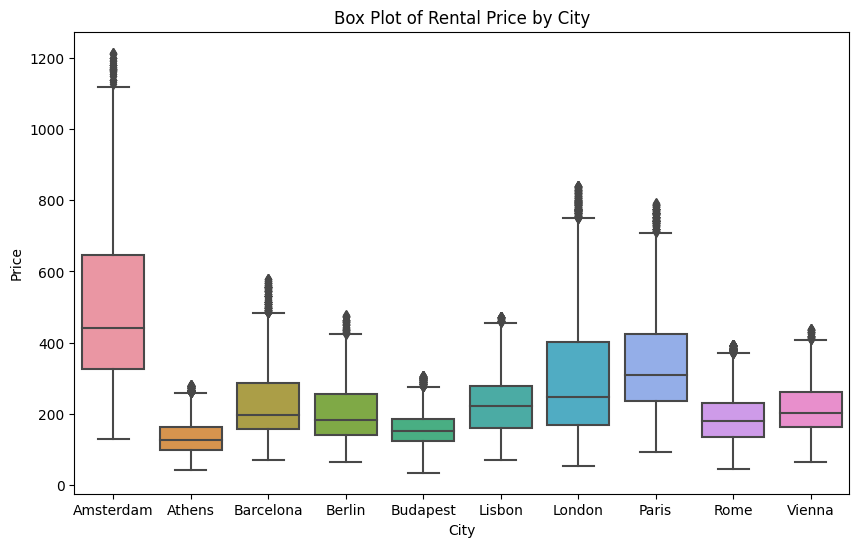

In [20]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', data=cleaned_data_no_outliers)

# Customize the plot
plt.title('Box Plot of Rental Price by City')
plt.xlabel('City')
plt.ylabel('Price')

plt.show()

In [21]:
# Calculate descriptive statistics for price grouped by city
price_summary = cleaned_data_no_outliers.groupby('city')['price'].describe().round(2)
price_summary = price_summary.style.set_table_styles(
    {
        '': [
            {'selector': 'thead th', 'props': 'background-color: #f7f7f7; color: #333; font-weight: bold; text-align: center; border-bottom: 1px solid #ddd;'},
            {'selector': 'tbody tr:nth-child(even)', 'props': 'background-color: #fafafa;'}
        ],
        'Index Column': [
            {'selector': '.index_name', 'props': 'background-color: #f0f0f0; font-weight: bold; text-align: left;'}
        ],
        'Data Cells': [
            {'selector': 'td', 'props': 'text-align: right; padding: 0.5em; border-bottom: 1px solid #eee;'}
        ]
    }
).set_properties(**{'border-collapse': 'collapse', 'border': 'none'}).format(precision=2)

price_summary

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Amsterdam,1975.00,506.91,236.89,128.89,325.26,442.43,645.37,1214.12
Athens,4987.00,134.00,49.11,42.88,97.49,126.31,162.40,280.51
Barcelona,2606.00,235.66,113.04,69.59,156.17,196.90,287.20,578.58
Berlin,2319.00,206.91,85.73,64.97,141.39,183.23,254.98,476.54
Budapest,3799.00,157.82,51.99,34.78,123.14,150.63,184.71,307.14
Lisbon,5571.00,226.16,84.99,70.59,159.01,222.09,278.85,473.26
London,9462.00,300.90,169.68,54.33,167.69,246.13,400.76,840.57
Paris,6302.00,343.59,148.05,92.74,236.28,308.04,425.02,792.48
Rome,8594.00,188.08,68.99,46.06,136.07,178.62,230.52,393.47


The box plot and table show that Athens, Budapest, and Rome have the lowest average prices and the smallest price differences, while Amsterdam has the highest average rental price and the largest in-city price differences.

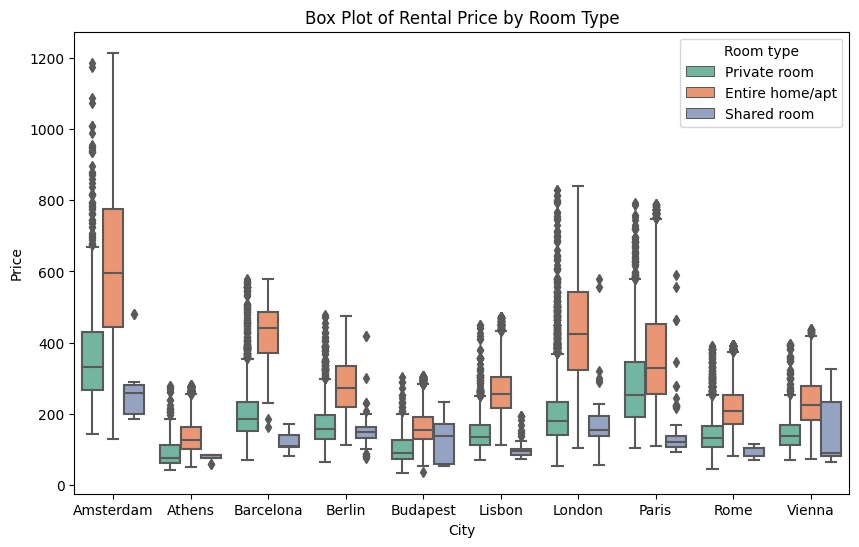

In [22]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', hue='room_type', data=cleaned_data_no_outliers)

# Customize the plot
plt.title('Box Plot of Rental Price by Room Type')
plt.xlabel('City')
plt.ylabel('Price')
plt.legend(title='Room type')

plt.show()

It is reasonable that entire homes or apartments cost more because they have larger spaces and can accommodate more people. Shared rooms are priced lower because guests may need to share spaces with others. Interestingly, in Budapest, the median rental price of shared rooms is slightly higher than that of private rooms.

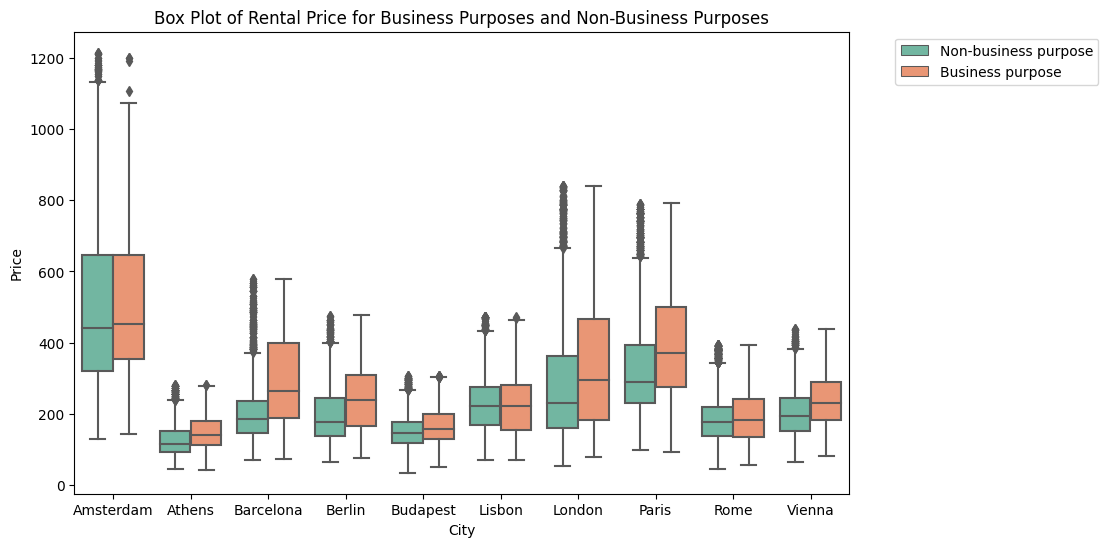

In [23]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', hue='biz', data=cleaned_data_no_outliers)

# Customize the plot
plt.title('Box Plot of Rental Price for Business Purposes and Non-Business Purposes')
plt.xlabel('City')
plt.ylabel('Price')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Non-business purpose', 'Business purpose'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The median prices of listings for business purposes are higher in most cities compared to non-business purposes, except in Lisbon.

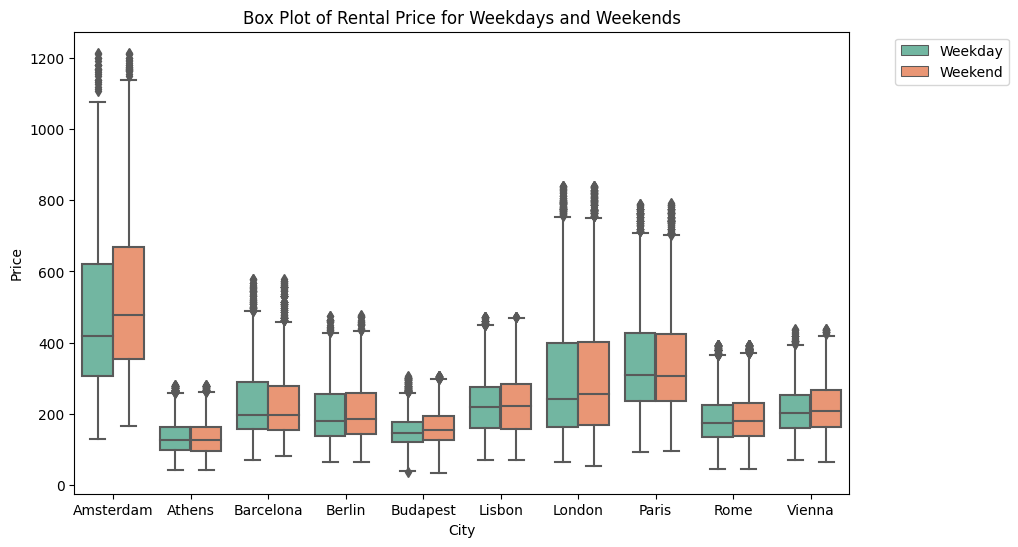

In [24]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', hue='is_weekend', data=cleaned_data_no_outliers)

# Customize the plot
plt.title('Box Plot of Rental Price for Weekdays and Weekends')
plt.xlabel('City')
plt.ylabel('Price')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Weekday','Weekend'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Notably, the rental prices for weekdays and weekends are similar, except in Amsterdam, where the median price is apparently higher on weekends.

### Q2: Which cities and property types have lower avearge guest satisfaction ratings?

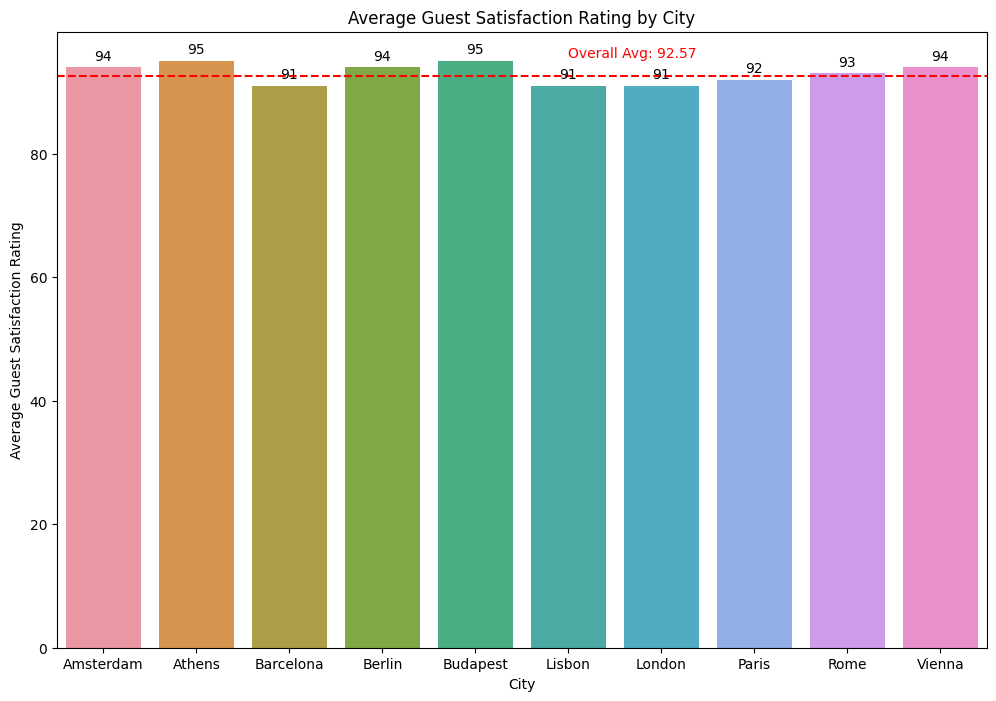

In [25]:
# Calculate the average guest satisfaction rating by city
mean_satisfaction_ratings = cleaned_data_no_outliers.groupby(['city'])['guest_satisfaction_overall'].mean().reset_index()
mean_satisfaction_ratings['guest_satisfaction_overall'] = mean_satisfaction_ratings['guest_satisfaction_overall'].round()

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='guest_satisfaction_overall', data=mean_satisfaction_ratings, errorbar=None)

# Customize the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Average Guest Satisfaction Rating by City')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Rating')
plt.xticks(rotation=0, ha='center')

# Add a line to represent the overall average rating
overall_average_rating = cleaned_data_no_outliers['guest_satisfaction_overall'].mean()
plt.axhline(overall_average_rating, color='red', linestyle='--', label=f'Overall Average Rating: {overall_average_rating:.2f}')
plt.text(x=5, y=overall_average_rating + 3,
         s=f'Overall Avg: {overall_average_rating:.2f}', color='red')

plt.show()

According to the bar chart, Barcelona, Lisbon, London and Paris have lower average guest satisfaction ratings, which are below the overall average ratings for all cities.

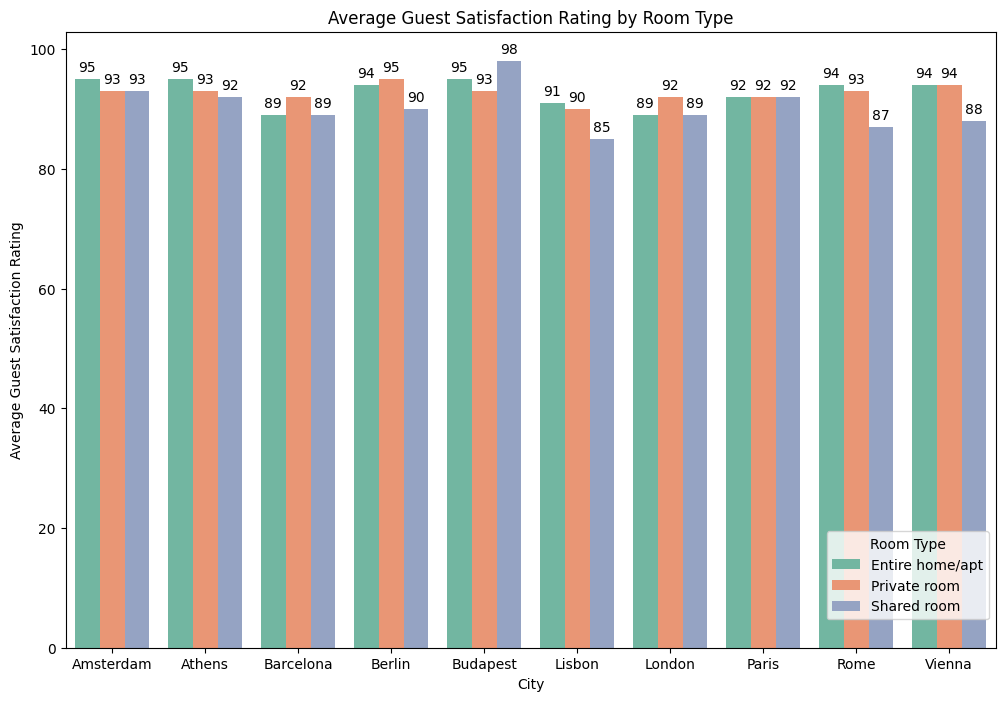

In [26]:
# Calculate the avearge guest satisfaction rating by room type
mean_satisfaction_ratings = cleaned_data_no_outliers.groupby(['city', 'room_type'])['guest_satisfaction_overall'].mean().reset_index()
mean_satisfaction_ratings['guest_satisfaction_overall'] = mean_satisfaction_ratings['guest_satisfaction_overall'].round()

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='guest_satisfaction_overall', hue='room_type', data=mean_satisfaction_ratings, errorbar=None)

# Customize the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Average Guest Satisfaction Rating by Room Type')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Rating')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Room Type', bbox_to_anchor=(1, 0.2), loc='upper right')

plt.show()

If we analyze by room types, the shared room has a lower average rating compared to the other two room types in Athens, Berlin, Lisbon, Rome, and Vienna.

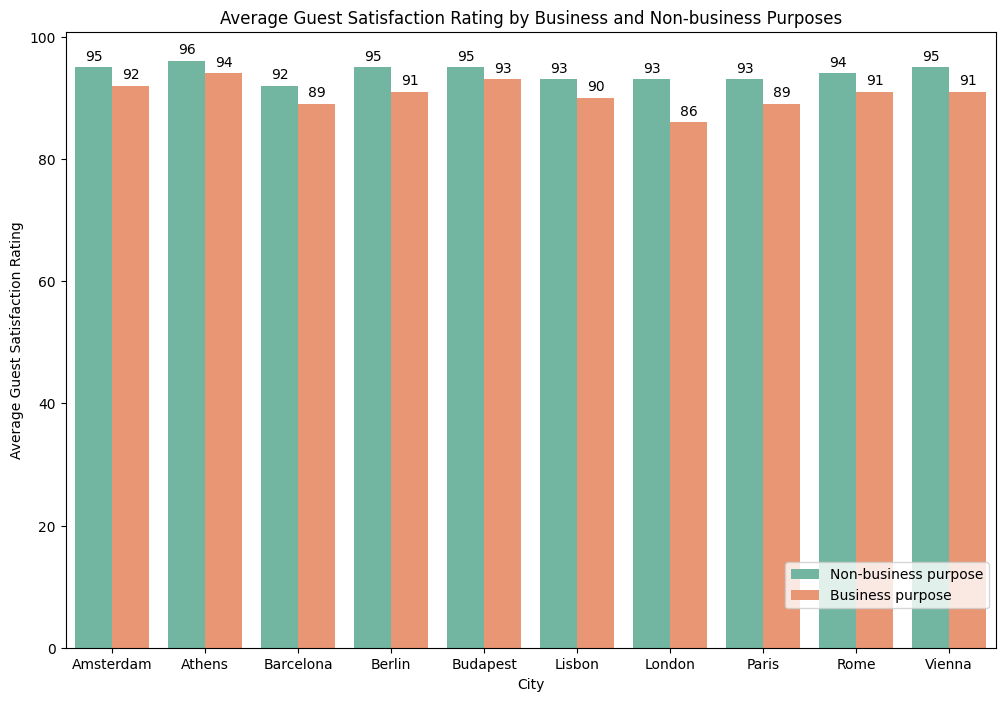

In [27]:
# Calculate the avearge guest satisfaction rating by business/non-business purposes
mean_satisfaction_ratings = cleaned_data.groupby(['city', 'biz'])['guest_satisfaction_overall'].mean().reset_index()
mean_satisfaction_ratings['guest_satisfaction_overall'] = mean_satisfaction_ratings['guest_satisfaction_overall'].round()

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='guest_satisfaction_overall', hue='biz', data=mean_satisfaction_ratings, errorbar=None)

# Customize the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Average Guest Satisfaction Rating by Business and Non-business Purposes')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Rating')
plt.xticks(rotation=0, ha='center')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Non-business purpose', 'Business purpose'], bbox_to_anchor=(1, 0.15), loc='upper right')

plt.show()

Another interesting observation is that listings for business purposes apparently have lower satisfaction ratings than those for non-business purposes, which requires further investigation.

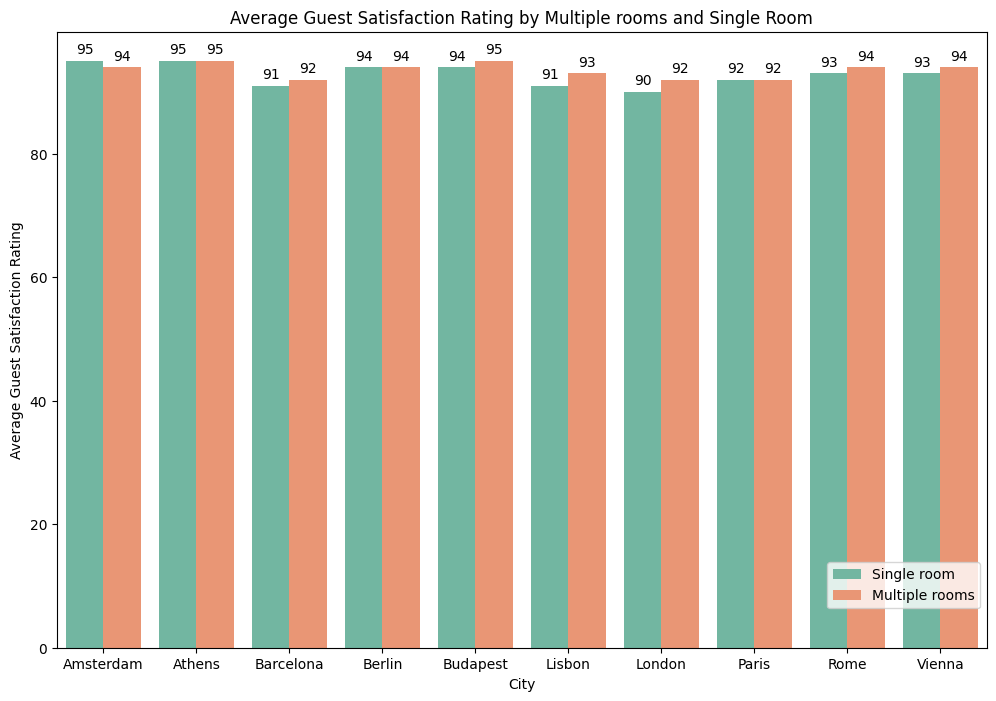

In [28]:
# Calculate the avearge guest satisfaction rating by
mean_satisfaction_ratings = cleaned_data.groupby(['city', 'multi'])['guest_satisfaction_overall'].mean().reset_index()
mean_satisfaction_ratings['guest_satisfaction_overall'] = mean_satisfaction_ratings['guest_satisfaction_overall'].round()

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='guest_satisfaction_overall', hue='multi', data=mean_satisfaction_ratings, errorbar=None)

# Customize the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Average Guest Satisfaction Rating by Multiple rooms and Single Room')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Rating')
plt.xticks(rotation=0, ha='center')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Single room', 'Multiple rooms'], bbox_to_anchor=(1, 0.15), loc='upper right')

plt.show()

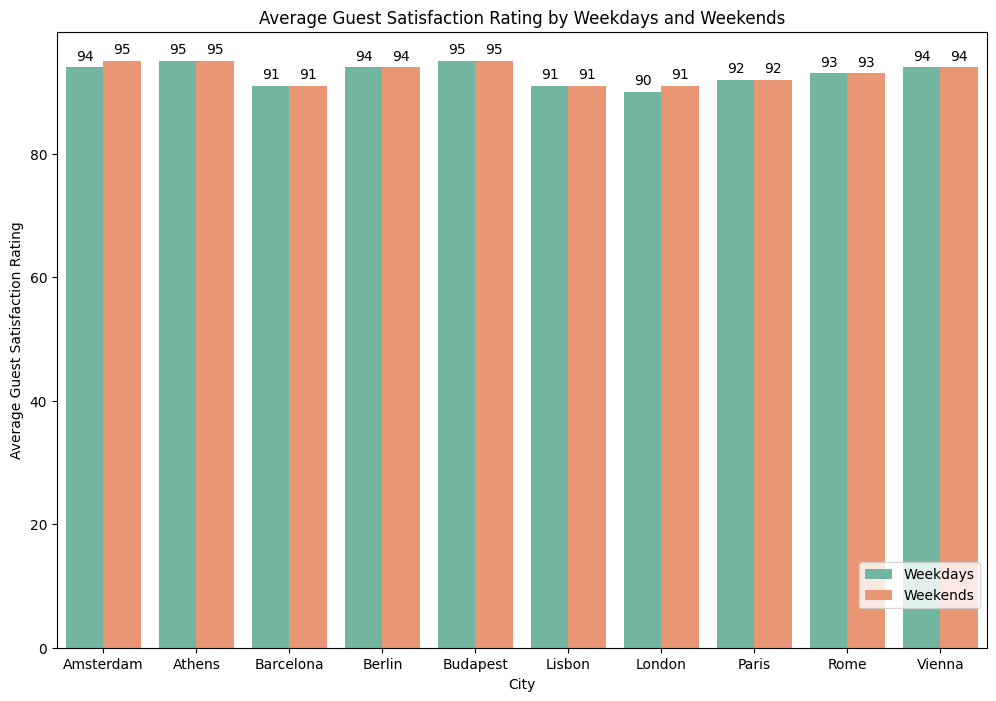

In [29]:
# Calculate the avearge guest satisfaction rating by weekdays and weekends
mean_satisfaction_ratings = cleaned_data.groupby(['city', 'is_weekend'])['guest_satisfaction_overall'].mean().reset_index()
mean_satisfaction_ratings['guest_satisfaction_overall'] = mean_satisfaction_ratings['guest_satisfaction_overall'].round()

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='guest_satisfaction_overall', hue='is_weekend', data=mean_satisfaction_ratings, errorbar=None)

# Customize the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Average Guest Satisfaction Rating by Weekdays and Weekends')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Rating')
plt.xticks(rotation=0, ha='center')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Weekdays', 'Weekends'], bbox_to_anchor=(1, 0.15), loc='upper right')

plt.show()

Conversely, there are no obvious differences in guest satisfaction ratings between single and multiple rooms, or between weekdays and weekends.

### Q3: How do index and distance attributes correlate with guest satisfaction rating?

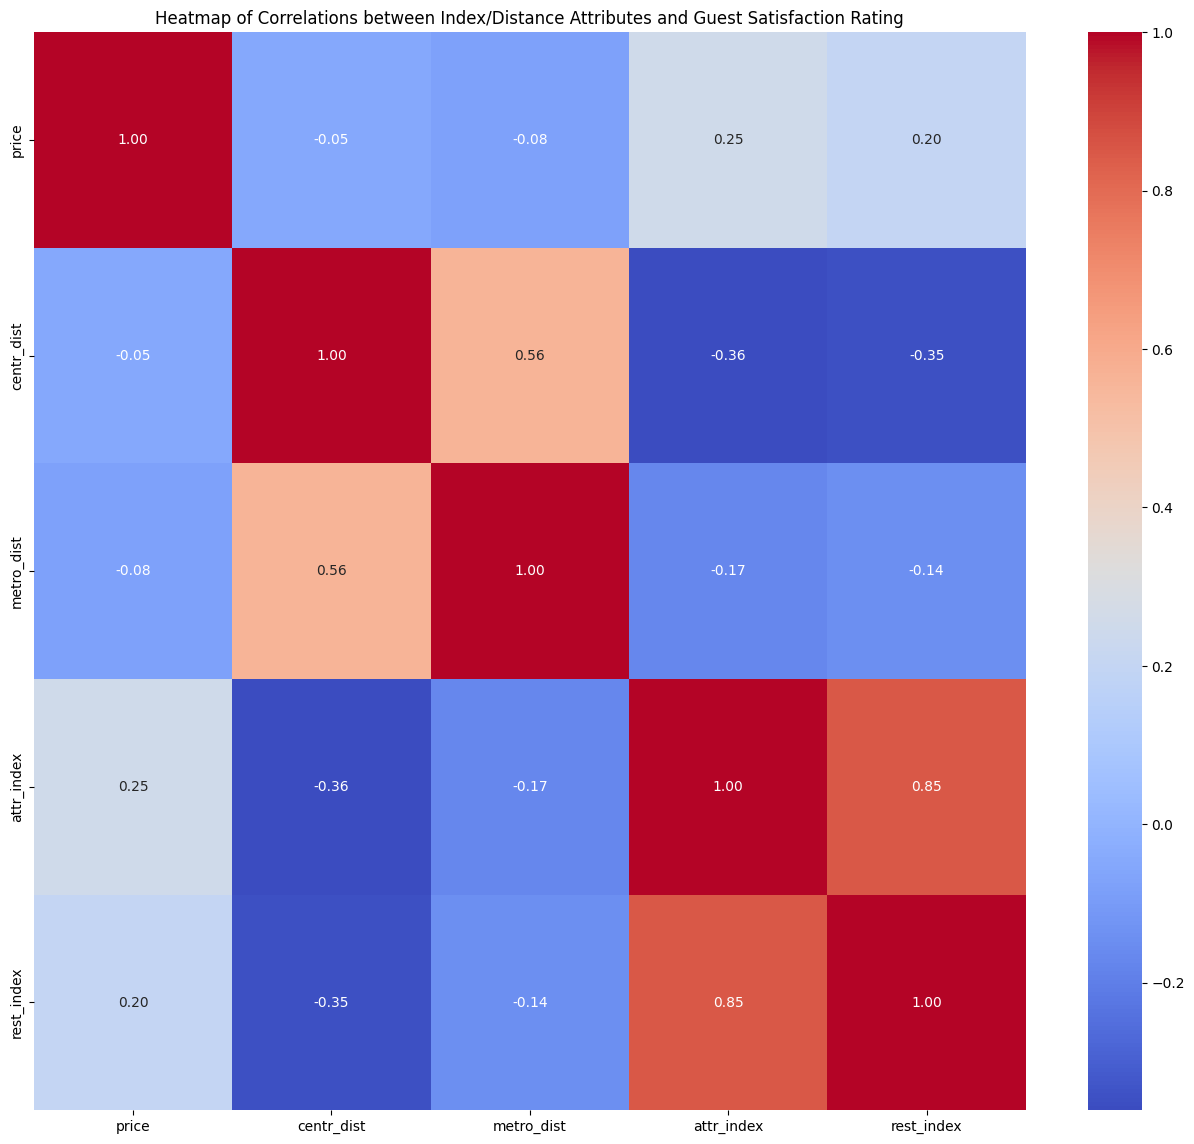

In [30]:
# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(cleaned_data_no_outliers[['price','centr_dist','metro_dist','attr_index','rest_index']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations between Index/Distance Attributes and Guest Satisfaction Rating')

plt.show()

The correlation coefficients between price and the index and distance attributes are all below 0.25, suggesting that there is no strong linear relationship between price and these variables.

### Q4: Which city has a higher attraction index and restaurant index?

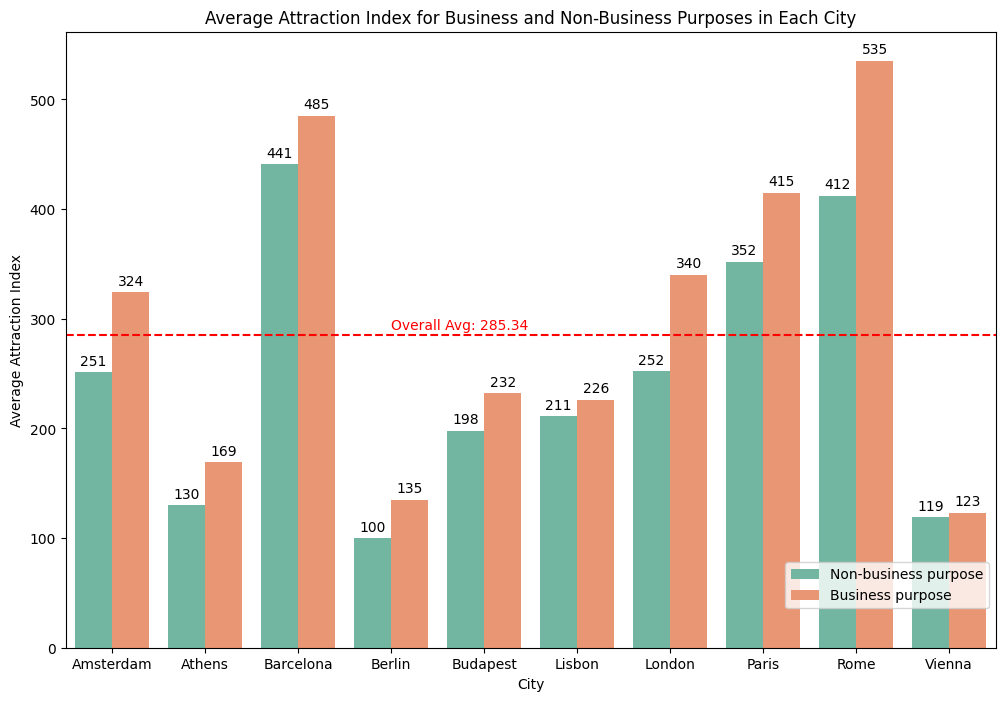

In [31]:
# Calculate the average attraction index by business/non-business purposes in each city
mean_index = cleaned_data_no_outliers.groupby(['city', 'biz'])['attr_index'].mean().reset_index()
mean_index['attr_index'] = mean_index['attr_index'].round()

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='attr_index', hue='biz', data=mean_index, errorbar=None)

# Customize the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Average Attraction Index for Business and Non-Business Purposes in Each City')
plt.xlabel('City')
plt.ylabel('Average Attraction Index')
plt.xticks(rotation=0, ha='center')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Non-business purpose', 'Business purpose'], bbox_to_anchor=(1, 0.15), loc='upper right')

# Add a line to represent the overall average index
overall_average_index = cleaned_data_no_outliers['attr_index'].mean()
plt.axhline(overall_average_index, color='red', linestyle='--', label=f'Overall Attraction Index: {overall_average_index:.2f}')
plt.text(x=3, y=overall_average_index + 5,
         s=f'Overall Avg: {overall_average_index:.2f}', color='red')

plt.show()

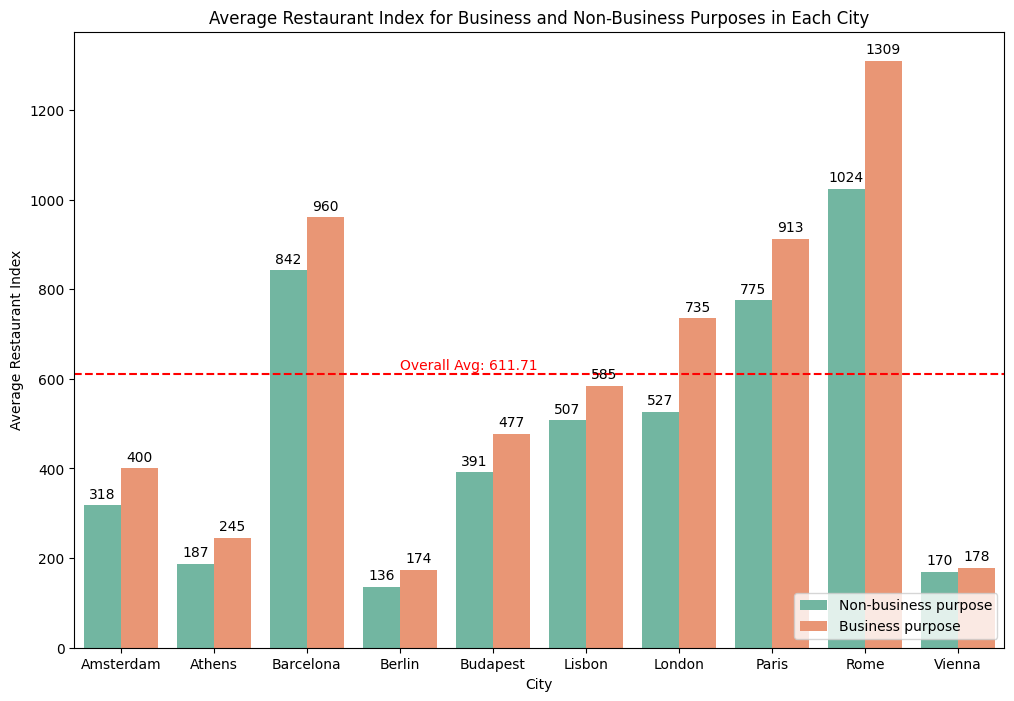

In [32]:
# Calculate the average restaurant index by business/non-business purposes in each city
mean_index = cleaned_data_no_outliers.groupby(['city', 'biz'])['rest_index'].mean().reset_index()
mean_index['rest_index'] = mean_index['rest_index'].round()

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='rest_index', hue='biz', data=mean_index, errorbar=None)

# Customize the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Average Restaurant Index for Business and Non-Business Purposes in Each City')
plt.xlabel('City')
plt.ylabel('Average Restaurant Index')
plt.xticks(rotation=0, ha='center')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Non-business purpose', 'Business purpose'], bbox_to_anchor=(1, 0.1), loc='upper right')

# Add a line to represent the overall average rating
overall_average_index = cleaned_data_no_outliers['rest_index'].mean()
plt.axhline(overall_average_index, color='red', linestyle='--', label=f'Overall Restaurant Index: {overall_average_index:.2f}')
plt.text(x=3, y=overall_average_index + 10,
         s=f'Overall Avg: {overall_average_index:.2f}', color='red')

plt.show()

Rome, Paris, and Barcelona have the top 3 highest average attraction and restaurant indices, suggesting that the listings in these cities are closer to popular attractions and restaurants. Also, it's quite intriguing that listings for business purposes show higher levels of attraction and restaurant indices compared to non-business listings.

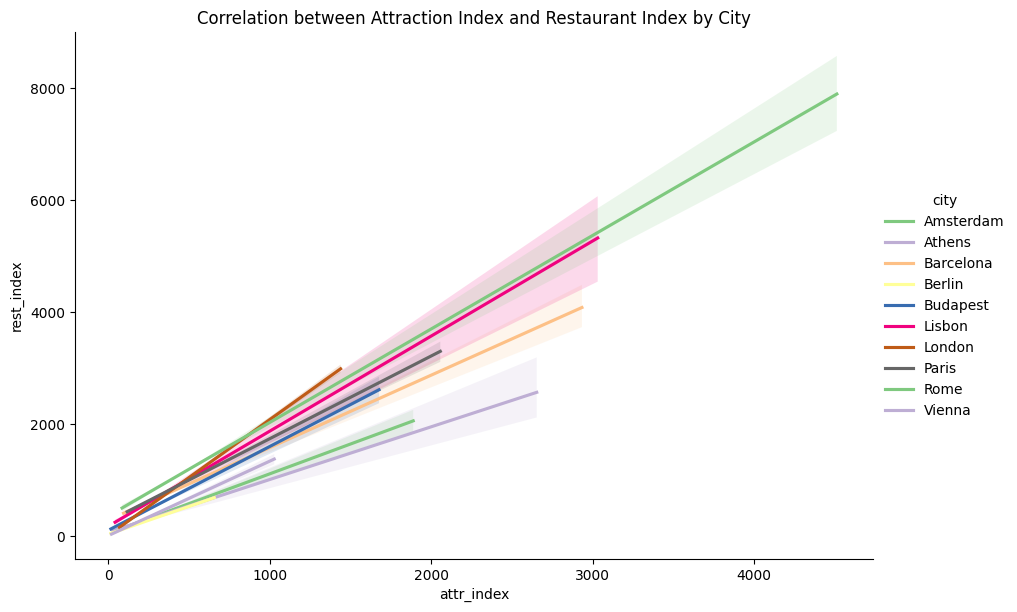

In [33]:
# Plot the regression lines between attraction index and restaurant index
sns.lmplot(x="attr_index", y="rest_index", hue="city", data=cleaned_data_no_outliers,
      scatter=False, markers="o", palette="Accent", aspect=1.5, height=6)
plt.title("Correlation between Attraction Index and Restaurant Index by City")
plt.show()

In [34]:
# Calculate the correlation coefficients between attraction index and restaurant index for each city
correlation_per_city = cleaned_data_no_outliers.groupby('city').apply(lambda x: x['attr_index'].corr(x['rest_index']),include_groups=False).reset_index()
correlation_per_city.columns = ['City', 'Correlation Coefficient']
correlation_per_city['Correlation Coefficient'] = correlation_per_city['Correlation Coefficient'].apply(lambda x: f'{x:.4g}')
correlation_per_city = correlation_per_city.sort_values(by='Correlation Coefficient', ascending=False)

# Apply styling to the table
styled_table = correlation_per_city.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
]).hide(axis='index')

styled_table

City,Correlation Coefficient
London,0.9054
Vienna,0.9009
Amsterdam,0.8771
Berlin,0.8684
Paris,0.8197
Rome,0.794
Lisbon,0.7589
Barcelona,0.7206
Budapest,0.7
Athens,0.649


Further analysis reveals a positive linear correlation between attraction and restaurant indices in all cities, indicating that cities with higher attraction indices also tend to have higher restaurant indices, and vice versa.

### Q5: Which city has higher concentration of listings near the closest metro station?

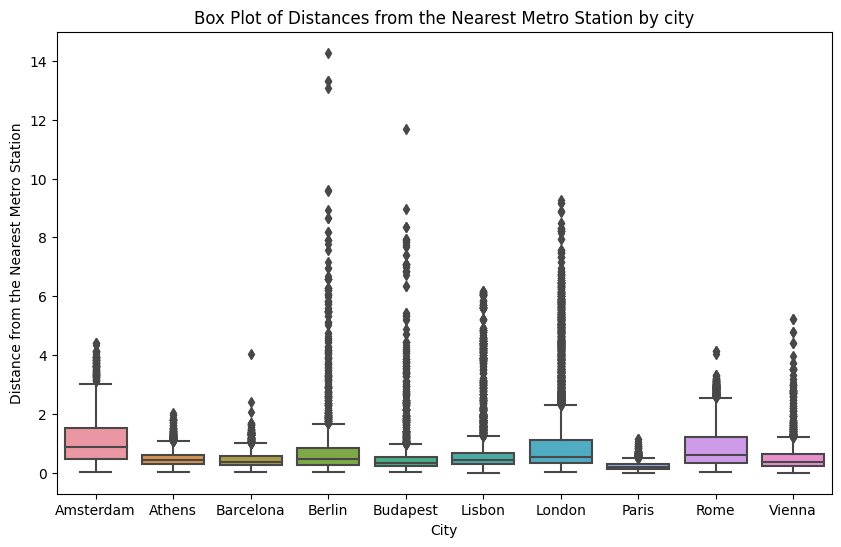

In [35]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='metro_dist', data=cleaned_data_no_outliers)

# Customize the plot
plt.title('Box Plot of Distances from the Nearest Metro Station by city')
plt.xlabel('City')
plt.ylabel('Distance from the Nearest Metro Station')

plt.show()

In [36]:
# Calculate descriptive statistics for distance from the nearest metro station grouped by city
metro_dist_summary = cleaned_data_no_outliers.groupby('city')['metro_dist'].describe().round(2)

metro_dist_summary = metro_dist_summary.style.set_table_styles(
    {
        '': [
            {'selector': 'thead th', 'props': 'background-color: #f7f7f7; color: #333; font-weight: bold; text-align: center; border-bottom: 1px solid #ddd;'},
            {'selector': 'tbody tr:nth-child(even)', 'props': 'background-color: #fafafa;'}
        ],
        'Index Column': [
            {'selector': '.index_name', 'props': 'background-color: #f0f0f0; font-weight: bold; text-align: left;'}
        ],
        'Data Cells': [
            {'selector': 'td', 'props': 'text-align: right; padding: 0.5em; border-bottom: 1px solid #eee;'}
        ]
    }
).set_properties(**{'border-collapse': 'collapse', 'border': 'none'}).format(precision=2)

metro_dist_summary

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Amsterdam,1975.00,1.11,0.84,0.04,0.48,0.89,1.52,4.41
Athens,4987.00,0.48,0.29,0.02,0.29,0.42,0.61,2.04
Barcelona,2606.00,0.44,0.29,0.01,0.26,0.38,0.56,4.04
Berlin,2319.00,0.86,1.29,0.01,0.28,0.46,0.84,14.27
Budapest,3799.00,0.55,0.88,0.02,0.23,0.35,0.52,11.69
Lisbon,5571.00,0.71,0.92,0.01,0.29,0.45,0.68,6.16
London,9462.00,1.04,1.29,0.01,0.33,0.55,1.12,9.29
Paris,6302.00,0.23,0.12,0.00,0.14,0.21,0.29,1.15
Rome,8594.00,0.82,0.64,0.01,0.32,0.61,1.22,4.15


Paris has the highest concentration of listings near the closest metro station, followed by Athens and Barcelona.

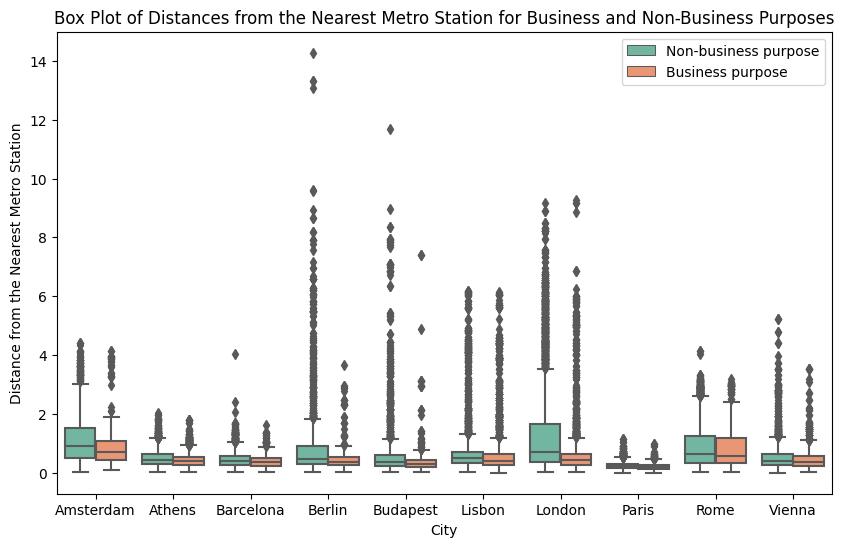

In [37]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='metro_dist', hue='biz', data=cleaned_data_no_outliers)

# Customize the plot
plt.title('Box Plot of Distances from the Nearest Metro Station for Business and Non-Business Purposes')
plt.xlabel('City')
plt.ylabel('Distance from the Nearest Metro Station')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title=None, handles=handles, labels=['Non-business purpose', 'Business purpose'], bbox_to_anchor=(1, 1), loc='upper right')

plt.show()

Additionally, business listings tend to be closer to the nearest metro station, as business travelers prioritize transportation convenience.

# Business Recommendations

## Opportunity 1: Identify pricing differentiation (Q1)

* Cities with lower rental prices, such as Athens, Budapest and Rome, are more suitable for guests on a tight budget. It's a marketing oppournity targeted for such guests.
* Amsterdam, Budapest, and Lisbon have distinct characteristics compared to other cities when analyzing specific listing types. It's worth delving deeper to uncover the real causes behind these observations.

## Opportunity 2: Improve host performance (Q2 & Q3)

* To prevent guests from leaving negative feedback and switching to competitor platforms, it's important to thoroughly investigate the less satisfactory cities and specific room types to identify the root cause. Afterward, improvement strategies can be developed, such as providing hosts with guides and support for achieving higher ratings.

* Especially for the listings intended for business purposes, it is crucial to identify the cause of lower satisfaction from the business traveler's perspective so that we can attract more enterprise customers.

* Th lack of strong linear correlation between price and the index and distance attributes might be influenced by the right-skewed distribution of the price data. Therefore, it may be necessary to apply data transformation techniques to address this skewness before developing the prediction model.

## Opportunity 3: Enhance guest experience (Q4 & Q5)

* Rome, Paris, and Barcelona are ideal for guests who enjoy popular tourist attractions and restaurants, as the accommodations are easily accessible from these locations. This presents another marketing opportunity for such guests.
* When making price predictions, it's crucial to consider the linear correlation between the attraction index and restaurant index, as it could impact the model's accuracy.
* High concentrations of listings near metro stations can be a selling point for guests who prioritize convenient transportation. Cities like Paris, Athens, and Barcelona are particularly well-suited for this, offering ample options for such guests.
* At the same time, it's important to monitor the supply of listings in these areas to avoid oversaturation and unhealthy competition.